# Bootcamp: Engenheiro de Machine Learning

## Wine Quality

**Este é um projeto desenvolvido para o curso de Fundamentos de Aprendizado de Máquina, onde é realizada uma análise exploratória dos dados e ajuste de modelos de classificação utilizando o dataset Wine Quality.**

## Objetivos

* Realizar a análise exploratória dos dados (EDA - Exploratory Data Analysis).
* Preparar os dados para utilização nos modelos de classificação.
* Comparar e ajustar diferentes modelos de classificação.

## Enunciado

O dataset utilizado neste projeto é uma versão modificada do dataset "Wine Quality" disponível no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine). Este dataset contém um conjunto de atributos (dados de sensores) sobre o processo de fabricação de vinhos (tinto e branco), sendo utilizados para classificar a qualidade do vinho obtido ao final do processo. Para este projeto, é necessário baixar o arquivo "winequality-red.csv" presente na pasta data.

## Atividades

### Os alunos deverão desempenhar as seguintes atividades:

**Implementar os algoritmos, utilizar as definições abaixo:**

* Algoritmo KNN:
    * clf_KNN = KNeighborsClassifier(n_neighbors=5)
* Algoritmo Árvore de Decisão:
    * clf_arvore = DecisionTreeClassifier()
* Algoritmo Floresta Randômica:
    * clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
* Algoritmo SVM:
    * clf_svm = SVC(gamma='auto', kernel='rbf')
* Algoritmo Rede MLP:
    * clf_mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)


**Obs.:**

1. Quando for realizar a leitura do arquivo "winequality-red.csv" com a função pandas.read_csv(), é necessário utilizar o atributo "sep=';'" para que as colunas sejam reconhecidas.
2. Para a divisão dos dados de treinamento e teste dos algoritmos, utilizar o valor de "random_state=1" e a proporção de 70% para treinamento e 30% para teste.
3. Utilizar a normalização dos dados utilizando o MinMaxScaler para todos os algoritmos.
4. Utilizar a variável "quality" como saída e as demais como entrada do modelo.
5. Para a última questão, considere a realização das mesmas etapas desenvolvidas (MinMaxScaler, train_test_split etc.).

In [43]:
#Importando as libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Carregando o dataset
df = pd.read_csv('../data/winequality-red.csv', sep=';')

In [74]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# 1 No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?
df.shape

(1599, 12)

In [10]:
# 2 Quantos tipos diferentes de dados existem no dataset do desafio?
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [16]:
# Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açúcar)?
df['residual sugar'].isnull().sum() / len(df)

0.0

In [24]:
# Qual é o desvio padrão para a variável "fixed acidity"?
round(df['fixed acidity'].std(),1)

1.7

In [27]:
# Qual é a mediana para a variável "residual sugar"?
df['residual sugar'].median()

2.2

**6. Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH", é CORRETO afirmar:**

* Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".

* Existe uma correlação negativa. Quanto menor o "fixed acidity, menor é o "pH".

* Existe uma correlação negativa. Quanto maior o "fixed acidity, maior é o "pH".

* Existe uma correlação positiva. Quanto maior o "fixed acidity, menor é o "pH".

In [40]:

df[['fixed acidity', 'pH']].corr(method='pearson')

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


**7. Sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol", mesmo sendo reduzido, é CORRETO dizer:**

* Quanto maior o teor alcoólico (alcohol), menor é a qualidade do vinho (quality).

* Não é possível dizer nada sobre a correlação entre as variáveis.

* Para analisar a correlação é necessário que o coeficiente seja superior a 1.

* Quanto maior o teor alcoólico (alcohol), maior é a qualidade do vinho (quality).

In [39]:
df[['alcohol', 'quality']].corr(method='pearson')

,alcohol,quality
alcohol,1.000000,0.476166
quality,0.476166,1.000000


<AxesSubplot:>

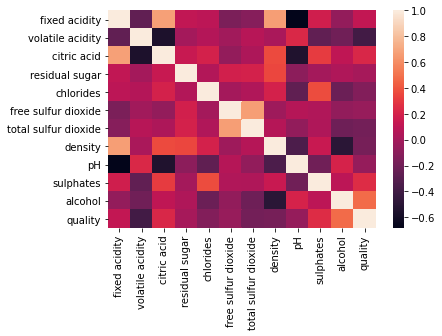

In [44]:
sns.heatmap(df.corr())

In [48]:
# 8 Quantas instâncias existem para a qualidade do vinho igual a 5?
df.query('quality == 5')['quality'].count()

681

In [49]:
# 9 Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada.
# Qual é o menor valor para a variável "fixed acidity"?
df['fixed acidity'].min() # sem aplicar a normalização.

4.6

In [80]:
# Separando a variável target, pois ela não irá sofrer a normalização.
X = df.drop('quality', axis=1)

In [76]:
# conferindo se a variável quality foi removida.
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [81]:
# Aplicando a transformação.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [82]:
# 9 Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada.
# Qual é o menor valor para a variável "fixed acidity"?
X['fixed acidity'].min() # Resposta do menor valor após a normalização.

0.0

In [83]:
# separando a variável target.
y = df['quality'] 


In [84]:
# X já está normalizado.
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [85]:
y.head() # variável target.

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [101]:
#10 Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1).
# Qual foi a acurácia para o KNN?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [87]:
#contruindo o modelo para cliassificação com KNN com K=5 que é o padrão.
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier() 

In [88]:
#treinando o modelo
clf_KNN.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier()

In [89]:
#realiza a previsão para o KNN
y_pred_KNN = clf_KNN.predict(X_test)

In [94]:
#acurácia do modelo via KNN
from sklearn.metrics import accuracy_score
print("Acurácia para a classificação utilizando o KNN:  ",accuracy_score(y_pred_KNN,y_test).round(2))

Acurácia para a classificação utilizando o KNN:   0.56


In [102]:
# 11 Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento
# e teste, como mostrado anteriormente, qual é o valor da acurácia?
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()

In [103]:
#treinamento do modelo
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [104]:
# Realizando a predição do modelo Decision Tree
y_pred_tree = clf_tree.predict(X_test)

In [105]:
#acurácia do modelo Decision Tree
print("Acurácia para a classificação utilizando o modelo de árvore de decisão foi:", accuracy_score(y_pred_tree,y_test).round(2))

Acurácia para a classificação utilizando o modelo de árvore de decisão foi: 0.58


In [106]:
# 12 Aplicando o algoritmo de floresta randômica com os mesmos parâmetros apresentados no enunciado e mesmos valores para o treinamento e teste.
# Qual é o valor mais próximo para a acurácia? clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)


In [107]:
clf_floresta.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [108]:
# Realizando a predição do modelo RandomForest
y_pred_floresta = clf_floresta.predict(X_test)

In [109]:
#acurácia do modelo Decision Tree
print("Acurácia para a classificação utilizando o modelo de Floresta Aleatória foi:", accuracy_score(y_pred_floresta,y_test).round(2))

Acurácia para a classificação utilizando o modelo de Floresta Aleatória foi: 0.68


In [110]:
#13 Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste,
# qual é o valor mais próximo para a acurácia obtido?
#importando o svm como classificador
from sklearn.svm import SVC
clf_svm=SVC(gamma='auto',kernel='rbf')


In [111]:
clf_svm.fit(X_train, y_train)

SVC(gamma='auto')

In [112]:
# Realizando a predição do modelo SVM
y_pred_SVM = clf_svm.predict(X_test)

In [113]:
#acurácia do modelo Decision Tree
print("Acurácia para a classificação utilizando o modelo SVM foi:", accuracy_score(y_pred_SVM,y_test).round(2))

Acurácia para a classificação utilizando o modelo SVM foi: 0.59


In [121]:
# 14 Aplicando a rede MLP, como mostrado no enunciado, e com os mesmos dados de treinamento e teste utilizados,
# qual é o valor mais próximo para a acurácia do modelo?
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

In [122]:
clf_mlp.fit(X_train, y_train)

C:\Users\jcnok\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), random_state=1)

In [123]:
# Realizando a predição do modelo MLP
y_pred_mlp = clf_mlp.predict(X_test)

In [124]:
#acurácia do modelo de rede MLP
print("Acurácia para a classificação utilizando o modelo rede MLP foi:", accuracy_score(y_pred_mlp,y_test).round(2))

Acurácia para a classificação utilizando o modelo rede MLP foi: 0.6


In [125]:
# 15 Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons
# e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica.
# Qual é o valor mais próximo da acurácia do modelo para esse novo dataset?
df['new_quality'] = df['quality'].apply(lambda x: 0 if x <= 5 else 1) # realizando a transformação.

In [126]:
#Variável foi criada conforme solicitado.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [127]:
# X já está normalizado
# separando a nova variável y
y = df['new_quality']

In [128]:
X.head() # apenas conferindo 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [129]:
y.head() #novo target no formato binário.

0    0
1    0
2    0
3    1
4    0
Name: new_quality, dtype: int64

In [131]:
#dividindo em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [133]:
print(X_train.shape), print(X_test.shape)
print(y_train.shape), print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


(None, None)

In [134]:
# carregando os hiperparametros do modelo
clf_floresta_bin = RandomForestClassifier(max_depth=10, random_state=1)

In [135]:
# Treinando o modelo
clf_floresta_bin.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [136]:
# Realizando a predição do modelo 
y_pred_floresta_bin = clf_floresta_bin.predict(X_test)

In [137]:
#acurácia do modelo de rede MLP
print("Acurácia para a classificação binária utilizando o modelo Random Forest foi:", accuracy_score(y_pred_floresta_bin,y_test).round(2))

Acurácia para a classificação binária utilizando o modelo Random Forest foi: 0.8
